In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch_nf
import numpy as np
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import Gauss
from torch_nf.util import plot_dist
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# figure out good Gaussian posterior inference problem
D = 4
Sigma = np.eye(D,)
mu_0 = np.zeros(D,)
Sigma_0 = 1*np.eye(D)

x_mean = 1.*np.ones(D,)
z0 = x_mean

N = 20

mu_n = np.dot(np.dot(Sigma_0, np.linalg.inv(Sigma_0 + Sigma/N)), x_mean) + \
       np.dot(np.dot(Sigma/N, np.linalg.inv(Sigma_0 + Sigma/N)), mu_0)
Sigma_n = np.dot(np.dot(Sigma_0, np.linalg.inv(Sigma_0 + Sigma/N)), Sigma/N)
print('N=%d: mu=' % N, mu_n)
print(Sigma_n)

N=20: mu= [0.95238095 0.95238095 0.95238095 0.95238095]
[[0.04761905 0.         0.         0.        ]
 [0.         0.04761905 0.         0.        ]
 [0.         0.         0.04761905 0.        ]
 [0.         0.         0.         0.04761905]]


### Run SNPE

In [3]:
from torch_nf.lfi import train_SNPE, train_APT
# Define system
D = 4
N = 20
gauss = Gauss(D, N)

# Opt params
M = 200
num_iters = 500
R = 4

# data for posterior
x0 = 1.*np.ones((1, D))

# two-network arch
arch_type = 'autoregressive'
hidden_layers = [50, 50]

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

nf = NormFlow(D, arch_type, True, num_stages=1, num_layers=1, num_units=20)
nf.count_num_params()
print(nf.D_params)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

328
Sequential(
  (linear1): Linear(in_features=4, out_features=50, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (relu2): Tanh()
  (linear3): Linear(in_features=50, out_features=328, bias=True)
)


<Figure size 432x288 with 0 Axes>

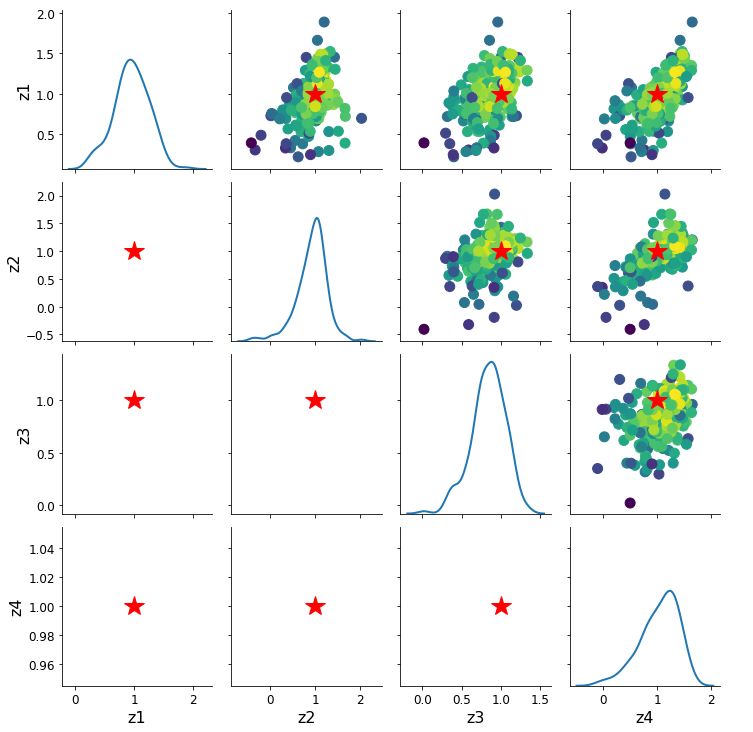

r 1, it 1, loss=1.34E+00, time/it=0.019
r 1, it 25, loss=1.95E-01, time/it=0.015
r 1, it 50, loss=8.33E-02, time/it=0.014
r 1, it 75, loss=2.29E-02, time/it=0.014
r 1, it 100, loss=2.52E-01, time/it=0.015
r 1, it 125, loss=6.41E-02, time/it=0.013
r 1, it 150, loss=8.84E-02, time/it=0.014
r 1, it 175, loss=2.19E-03, time/it=0.015
r 1, it 200, loss=4.34E-02, time/it=0.014
r 1, it 225, loss=1.50E-03, time/it=0.014
r 1, it 250, loss=1.79E-04, time/it=0.013
r 1, it 275, loss=1.33E-03, time/it=0.013
r 1, it 300, loss=6.69E-05, time/it=0.014
r 1, it 325, loss=3.48E-02, time/it=0.014
r 1, it 350, loss=1.11E-02, time/it=0.014
r 1, it 375, loss=1.20E-03, time/it=0.014
r 1, it 400, loss=7.31E-05, time/it=0.014
r 1, it 425, loss=2.98E-03, time/it=0.014
r 1, it 450, loss=9.89E-04, time/it=0.014
r 1, it 475, loss=1.29E-05, time/it=0.013
r 1, it 500, loss=1.82E-04, time/it=0.014


<Figure size 432x288 with 0 Axes>

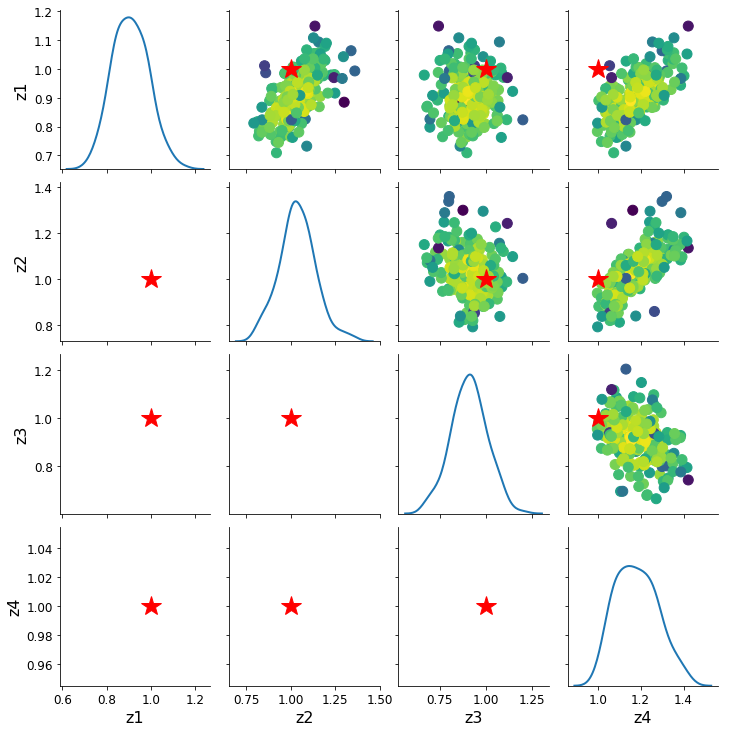

r 2, it 25, loss=1.84E+00, time/it=0.016
r 2, it 50, loss=1.90E+00, time/it=0.014
r 2, it 75, loss=1.74E+00, time/it=0.014
r 2, it 100, loss=1.57E+00, time/it=0.015
r 2, it 125, loss=1.94E+00, time/it=0.014
r 2, it 150, loss=1.94E+00, time/it=0.014
r 2, it 175, loss=1.49E+00, time/it=0.015
r 2, it 200, loss=1.96E+00, time/it=0.014
r 2, it 225, loss=1.74E+00, time/it=0.015
r 2, it 250, loss=1.40E+00, time/it=0.015
r 2, it 275, loss=1.40E+00, time/it=0.015
r 2, it 300, loss=1.75E+00, time/it=0.015
r 2, it 325, loss=1.73E+00, time/it=0.014
r 2, it 350, loss=1.90E+00, time/it=0.014
r 2, it 375, loss=1.55E+00, time/it=0.014
r 2, it 400, loss=2.16E+00, time/it=0.016
r 2, it 425, loss=2.36E+00, time/it=0.013
r 2, it 450, loss=2.07E+00, time/it=0.015
r 2, it 475, loss=1.90E+00, time/it=0.015
r 2, it 500, loss=1.74E+00, time/it=0.014


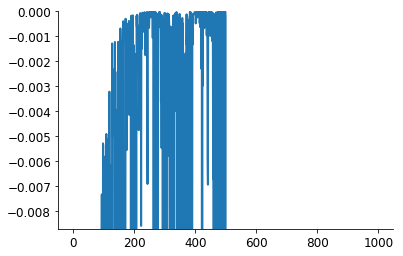

<Figure size 432x288 with 0 Axes>

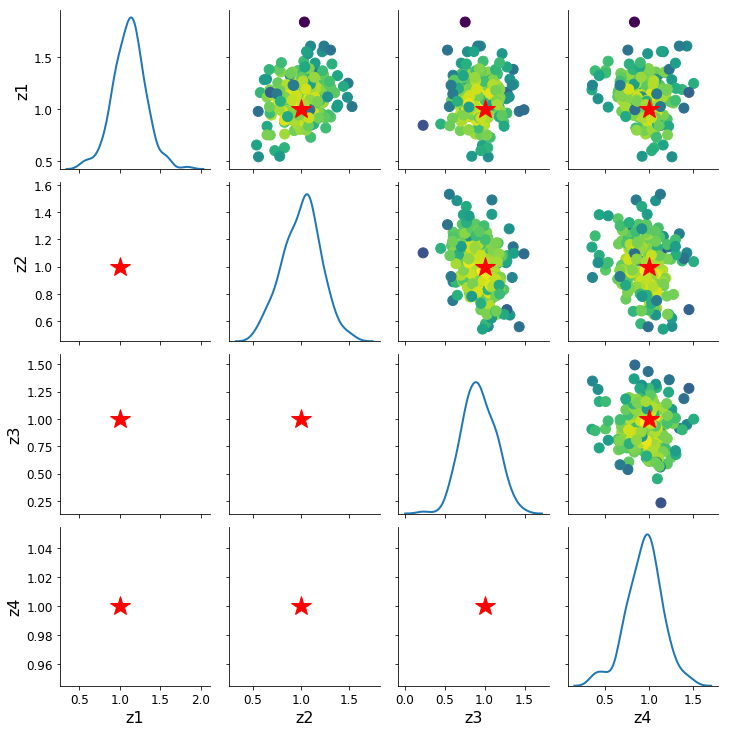

r 3, it 25, loss=2.25E+00, time/it=0.014
r 3, it 50, loss=1.93E+00, time/it=0.016
r 3, it 75, loss=2.53E+00, time/it=0.015
r 3, it 100, loss=2.21E+00, time/it=0.015
r 3, it 125, loss=2.29E+00, time/it=0.013
r 3, it 150, loss=2.40E+00, time/it=0.014
r 3, it 175, loss=2.33E+00, time/it=0.015
r 3, it 200, loss=2.34E+00, time/it=0.014
r 3, it 225, loss=2.11E+00, time/it=0.014
r 3, it 250, loss=1.77E+00, time/it=0.015
r 3, it 275, loss=2.09E+00, time/it=0.015
r 3, it 300, loss=2.02E+00, time/it=0.014
r 3, it 325, loss=2.23E+00, time/it=0.014
r 3, it 350, loss=2.33E+00, time/it=0.015
r 3, it 375, loss=2.47E+00, time/it=0.014
r 3, it 400, loss=2.19E+00, time/it=0.016
r 3, it 425, loss=2.29E+00, time/it=0.015
r 3, it 450, loss=2.11E+00, time/it=0.015
r 3, it 475, loss=2.34E+00, time/it=0.015
r 3, it 500, loss=1.80E+00, time/it=0.015


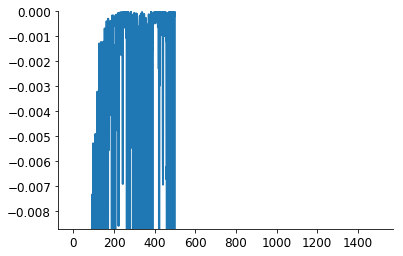

<Figure size 432x288 with 0 Axes>

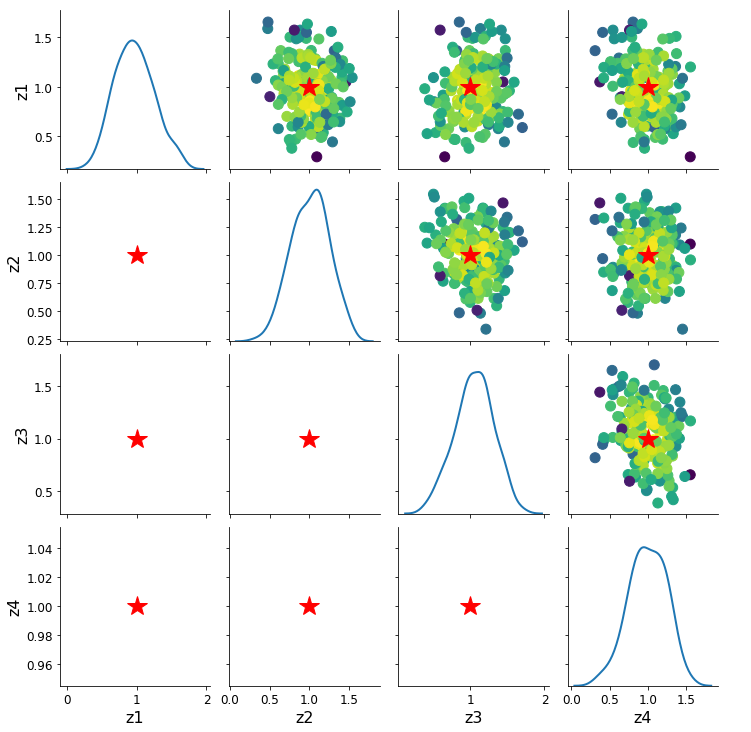

r 4, it 25, loss=2.37E+00, time/it=0.015
r 4, it 50, loss=2.66E+00, time/it=0.016
r 4, it 75, loss=2.39E+00, time/it=0.014
r 4, it 100, loss=2.31E+00, time/it=0.014
r 4, it 125, loss=2.11E+00, time/it=0.015
r 4, it 150, loss=2.25E+00, time/it=0.014
r 4, it 175, loss=2.44E+00, time/it=0.017
r 4, it 200, loss=2.43E+00, time/it=0.015
r 4, it 225, loss=2.33E+00, time/it=0.014
r 4, it 250, loss=2.22E+00, time/it=0.015
r 4, it 275, loss=2.50E+00, time/it=0.015
r 4, it 300, loss=2.42E+00, time/it=0.015
r 4, it 325, loss=2.10E+00, time/it=0.015
r 4, it 350, loss=2.50E+00, time/it=0.016
r 4, it 375, loss=2.00E+00, time/it=0.014
r 4, it 400, loss=2.56E+00, time/it=0.016
r 4, it 425, loss=2.73E+00, time/it=0.014
r 4, it 450, loss=2.35E+00, time/it=0.015
r 4, it 475, loss=2.22E+00, time/it=0.014
r 4, it 500, loss=2.23E+00, time/it=0.015


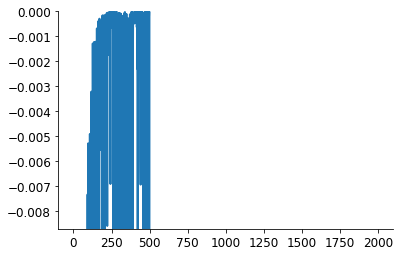

<Figure size 432x288 with 0 Axes>

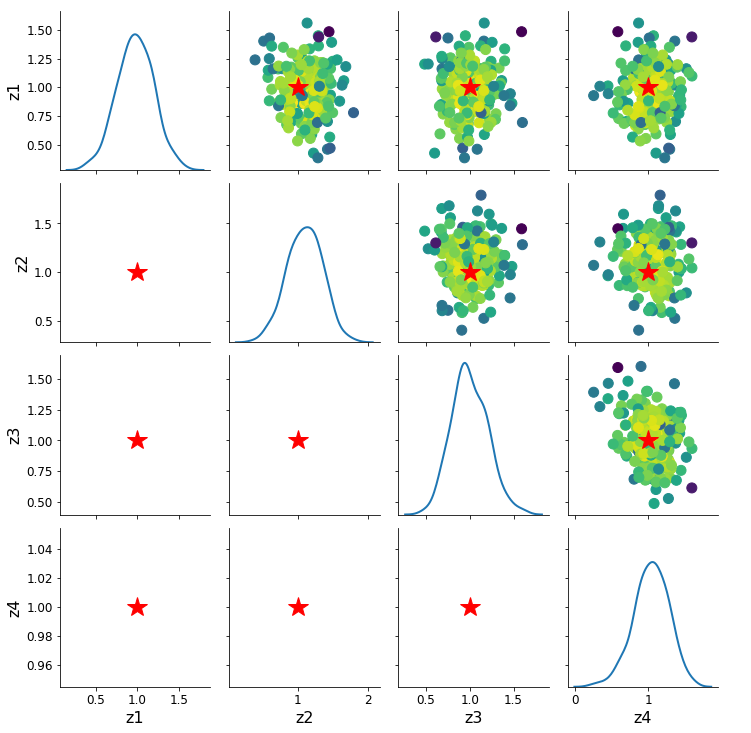

In [6]:
cnf, losses, zs, log_probs, it_time = train_APT(
    cnf, 
    gauss, 
    x0, 
    M=M, 
    R=R, 
    num_iters=num_iters, 
    z0=z0, 
    verbose=True
)

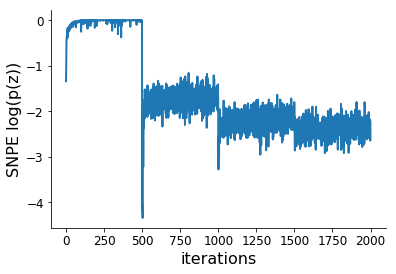

In [7]:
plt.figure()
plt.plot(-losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.show()

In [8]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

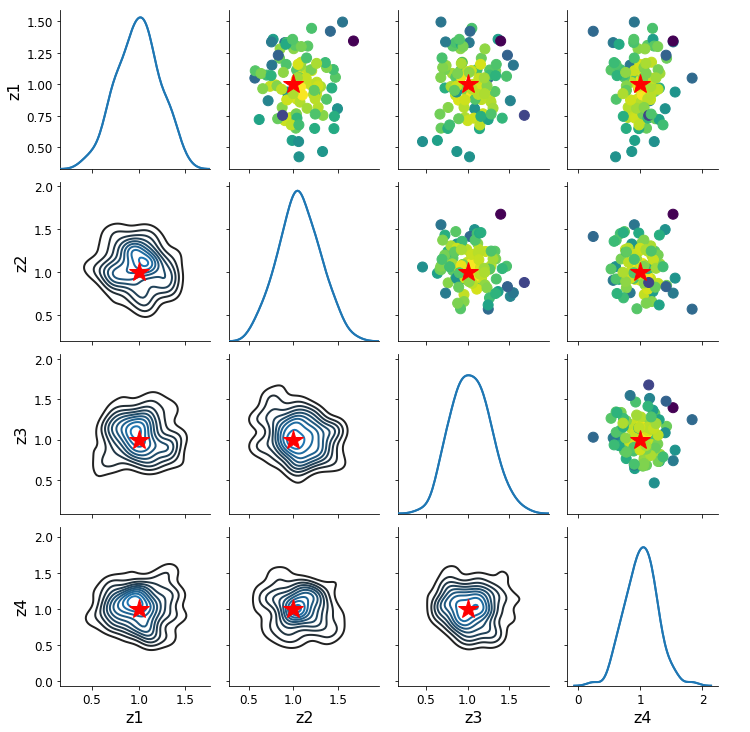

In [9]:
plt.figure()
plot_dist(z.detach().numpy()[0], log_prob.detach().numpy()[0], z0=z0, kde=True)
plt.show()